# QUESTION - 1(company.csv file) 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:\\Users\\Kavya\\Desktop\\DS Assignments\\ML\\Random forest\\Company_Data.csv")

In [3]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
list(df)

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

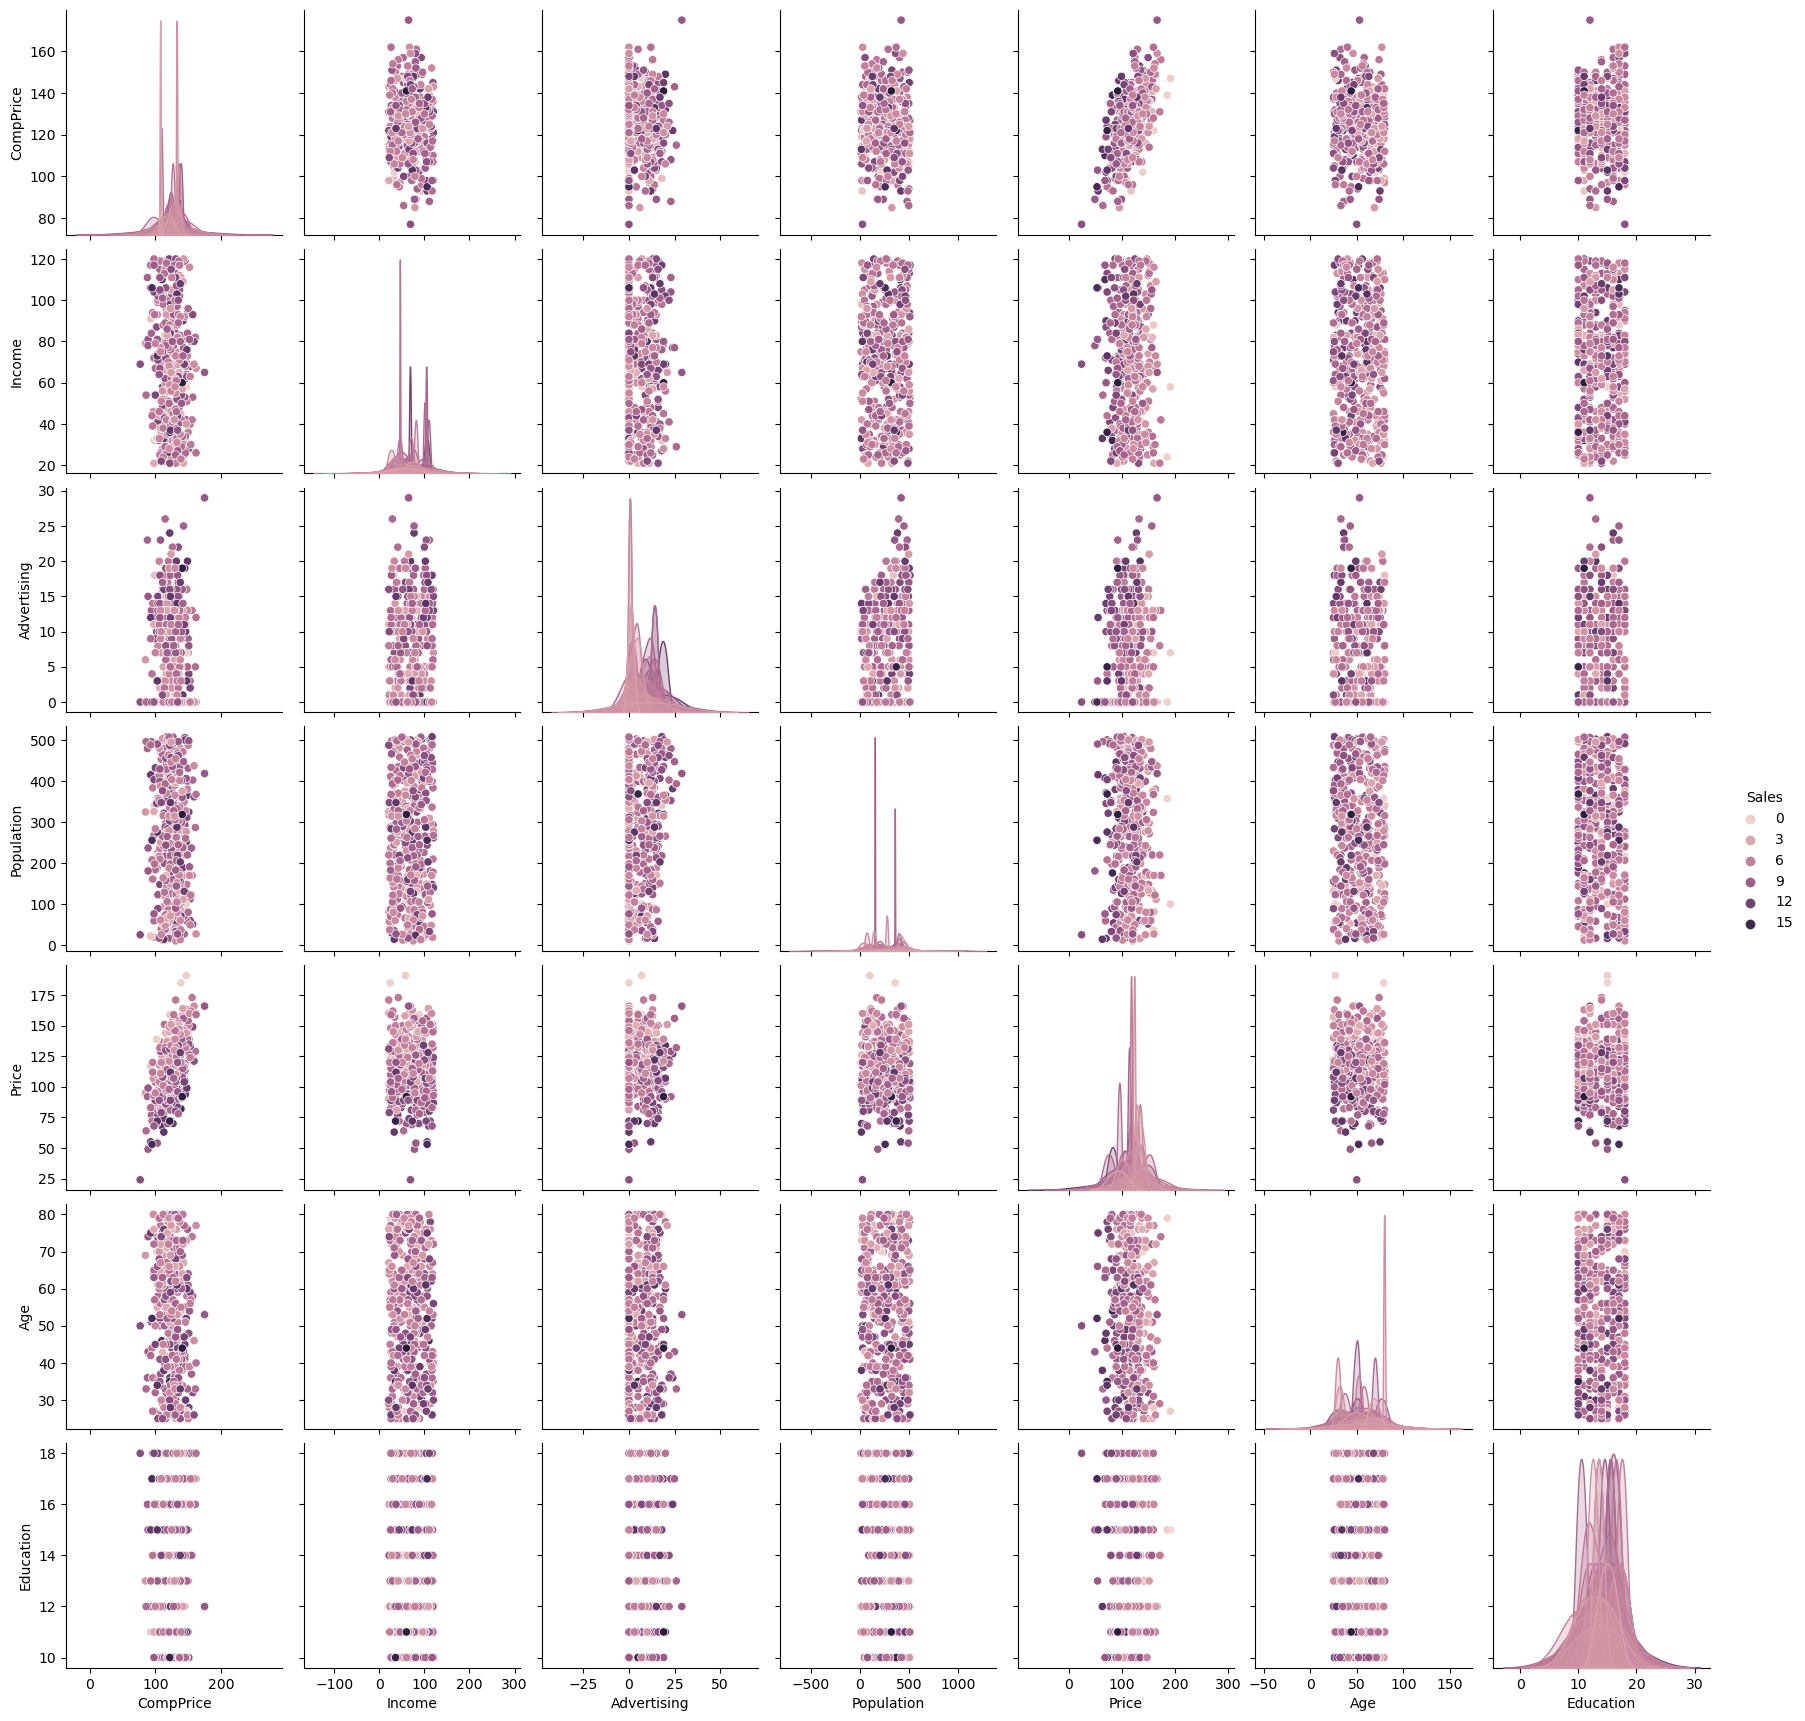

In [7]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data = df, hue = 'Sales')

In [8]:
# LABEL ENCODING
# Convert categorical variables to numerical using dummy variables
df = pd.get_dummies(df, columns=['Urban', 'US'], drop_first=True)

In [9]:
# Map 'ShelveLoc' values to numerical values
df['ShelveLoc'] = df['ShelveLoc'].map({'Good': 1, 'Medium': 2, 'Bad': 3})

In [13]:
#features (X) and target (y)
X = df.drop('Sales', axis=1)

In [14]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,138,73,11,276,120,3,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,3,50,12,1,1


In [25]:
y = df['Sales']

In [26]:
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [27]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000, random_state=42)

In [29]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [30]:
predictions = rf.predict(X_test)

In [31]:
# Mean absolute error and accuracy
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
mae = mean_absolute_error(y_test, predictions)

In [32]:
mape = mean_absolute_percentage_error(y_test, predictions)

In [33]:
accuracy = 100 - mape * 100

In [34]:
print(f"Mean Absolute Error: {round(mae, 2)}")
print(f"Accuracy: {round(accuracy, 2)}%")

Mean Absolute Error: 1.34
Accuracy: 77.86%


# QUESTION - 2(fraud check.csv)

In [20]:
import pandas as pd 
import numpy as np

In [21]:
df = pd.read_csv("C:\\Users\\Kavya\\Desktop\\DS Assignments\\ML\\Random forest\\Fraud_Check.csv")

In [22]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [24]:
df = df.rename({'Undergrad':'under_grad', 'Marital.Status':'marital_status', 'Taxable.Income':'taxable_income',
                    'City.Population':'city_population', 'Work.Experience':'work_experience', 'Urban':'urban'}, axis = 1)

In [25]:
df

,under_grad,marital_status,taxable_income,city_population,work_experience,urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [26]:
df['taxable_income'] = df.taxable_income.map(lambda x: 1 if x <= 30000 else 0)

In [27]:
df

,under_grad,marital_status,taxable_income,city_population,work_experience,urban
0,NO,Single,0,50047,10,YES
1,YES,Divorced,0,134075,18,YES
2,NO,Married,0,160205,30,YES
3,YES,Single,0,193264,15,YES
4,NO,Married,0,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,0,39492,7,YES
596,YES,Divorced,0,55369,2,YES
597,NO,Divorced,0,154058,0,YES
598,YES,Married,0,180083,17,NO


In [28]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [29]:
df['under_grad'] = LE.fit_transform(df['under_grad'])
df['marital_status'] = LE.fit_transform(df['marital_status'])
df['urban'] = LE.fit_transform(df['urban'])

In [30]:
df

,under_grad,marital_status,taxable_income,city_population,work_experience,urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,0,39492,7,1
596,1,0,0,55369,2,1
597,0,0,0,154058,0,1
598,1,1,0,180083,17,0


In [31]:
Y = df['taxable_income']

In [32]:
X = df[["under_grad","marital_status","city_population","work_experience","urban"]]

In [33]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100,max_samples=0.6,max_features=0.7)

In [34]:
RFC.fit(X,Y)

RandomForestClassifier(max_features=0.7, max_samples=0.6)

In [36]:
Y_pred = RFC.predict(X)

In [37]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(Y,Y_pred)
print(ac)

0.9516666666666667


In [38]:
from sklearn.model_selection import train_test_split

training_accuracy = []
test_accuracy = []

for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=i)
    RFC.fit(X_train,Y_train)
    Y_pred_train = RFC.predict(X_train)
    Y_pred_test  = RFC.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train ,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test ,Y_pred_test))

In [39]:
print("Average training accuracy:",np.mean(training_accuracy).round(3))
print("Average test accuracy:",np.mean(test_accuracy).round(3))

Average training accuracy: 0.947
Average test accuracy: 0.769
